In [1]:
import matplotlib.pyplot as plt

from utils_graph_generation import get_paths,load_graph
from utils_graph_metrics import calc_clust
from utils_graph_plot import get_all_markers

/home/msuarez/Escritorio/TFM_v_llanes/Social_Manifestations_Fractal/llanes/utils_graph_metrics.py:206: SyntaxWarning: invalid escape sequence '\s'
  """print("-----------------------------------")


In [2]:
# Carga un grafo dado un nombre y una ruta de archivos , devuelve los parametros necesarios
# para hacer las gráficas 2e y 2a
def calc_plots(name_graph, MAX_UMBRAL, graphs_folder, measures_name, deg=True, bipartite=False):
    G = load_graph(name_graph, graphs_folder)
    return calc_clust(G, MAX_UMBRAL, measures_name, deg=deg, bipartite=bipartite)

# PROCESO DE CREACIÓN DE GRAFOS

## MANIFESTACIÓN NAT - MODO HASHTAG

In [3]:

# Seleccionamos el modo con el que queremos crear nuestra red: Hashtags como nodos o usuarios como nodos o bipartita
#MODE = "bipartite"
#MODE = "hashtag"
MODE = "user"


# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 250

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar

MANIFESTACION = "9n"
# Hora critica 9n
hora = "437037"

MANIFESTACION = "nat"
# Hora critica NaT
hora = "429624"

if MODE == "bipartite":
    bipartite=True
else:
    bipartite=False

graphs_folder, plots_folder, measures_name = get_paths(MODE, MANIFESTACION, metric="correlation", hora=hora)
dict_tres_avg_clust_fig2e, dict_norm_int_deg_fig2a = calc_plots(hora, MAX_UMBRAL, graphs_folder, measures_name, deg=True, bipartite=bipartite)

graphs/nodes_user/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 1374, numero de aristas: 537866


100%|██████████| 250/250 [4:43:44<00:00, 68.10s/it]   


In [15]:

# Seleccionamos el modo con el que queremos crear nuestra red: Hashtags como nodos o usuarios como nodos o bipartita
#MODE = "bipartite"
#MODE = "hashtag"
MODE = "user"


# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 250

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar

MANIFESTACION = "9n"
# Hora critica 9n
hora = "437037"

MANIFESTACION = "nat"
# Hora critica 9n
hora = "429624"

if MODE == "bipartite":
    bipartite=True
else:
    bipartite=False

graphs_folder, plots_folder, measures_name = get_paths(MODE, MANIFESTACION, metric="correlation", hora=hora)
dict_tres_avg_clust_fig2e, dict_norm_int_deg_fig2a = calc_plots(hora, MAX_UMBRAL, graphs_folder, measures_name, deg=True, bipartite=bipartite)

graphs/nodes_user/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 1374, numero de aristas: 537866


 15%|█▌        | 38/250 [00:07<00:41,  5.17it/s]
/home/msuarez/Escritorio/TFM_v_llanes/Social_Manifestations_Fractal/llanes/utils_graph_metrics.py:206: SyntaxWarning: invalid escape sequence '\s'
  """print("-----------------------------------")


KeyboardInterrupt: 

### Configuraciones para los plot

In [12]:

arr_kt_plot=[0,1,2,3,4,5,6,7,8,9,10]

arr_kt_plot=[0,1,5,10,20,30,40,50,60,70,80]

arr_kt_plot=[10,15,20,25,30,35,40,45,50]

#arr_kt_plot=[5,10,20,50,100]
#arr_kt_plot = [10, 50, 100, 150, 200, 250, 300]
#arr_kt_plot = [995, 1000, 1025, 1050, 1075, 1100, 1125, 1150, 1170]


with_lines=True
dot_size=12
alpha=0.7

### Figura 2a

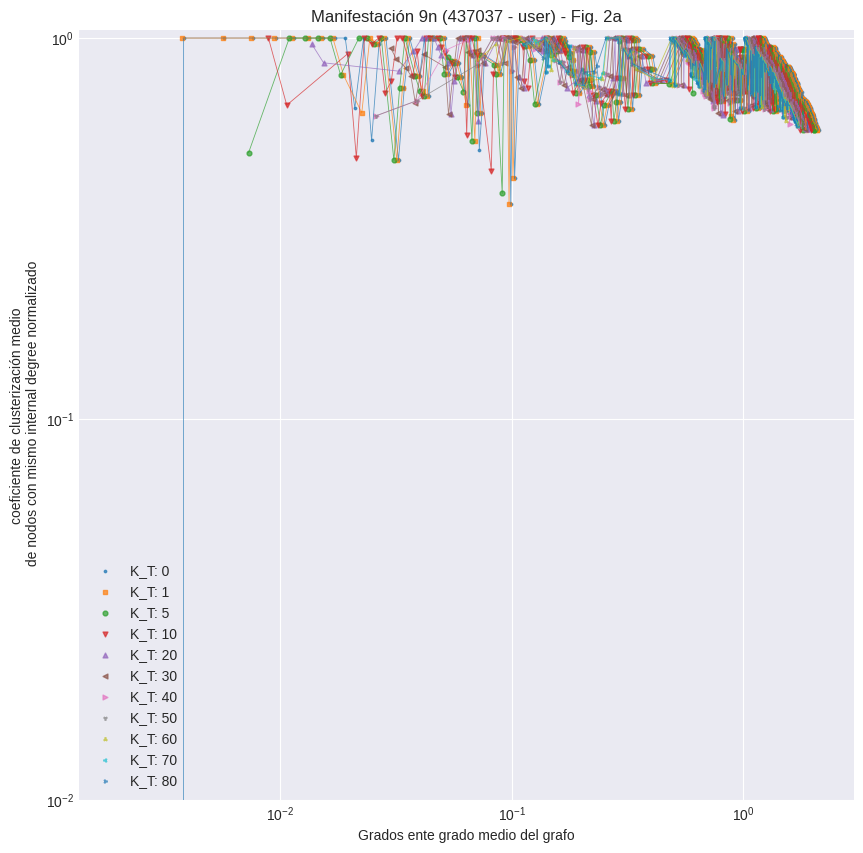

In [13]:
# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)

if len(arr_kt_plot) > 30:
    print("Error, el número de elementos a graficar no puede ser mayor a 30, cogemos solo los primeros 30")
    arr_kt_plot = arr_kt_plot[:30]

markers = get_all_markers()

fig = plt.figure(figsize=(10,10)) 
plt.style.use('seaborn-v0_8-darkgrid')

plt.xscale('log')  
plt.yscale('log')      
plt.ylim(0.01, 1.05)

for index, kt in enumerate(arr_kt_plot):
    if kt in dict_norm_int_deg_fig2a.keys():
        points_x = dict_norm_int_deg_fig2a[kt].keys()
        points_y = dict_norm_int_deg_fig2a[kt].values()
        if with_lines:
            plt.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        plt.scatter(points_x, points_y, alpha=alpha, s=dot_size, marker=markers[index], label=f'K_T: {kt}')        

plt.xlabel("Grados ente grado medio del grafo")
plt.ylabel("coeficiente de clusterización medio\n de nodos con mismo internal degree normalizado")

plt.title("Manifestación " + MANIFESTACION + ' (' + hora + " - " + MODE +") - Fig. 2a")
plt.legend()
plt.savefig(plots_folder + hora + "_Fig_2a - K_T_" + str(arr_kt_plot) + ".png")
plt.show()

### Figura 2e

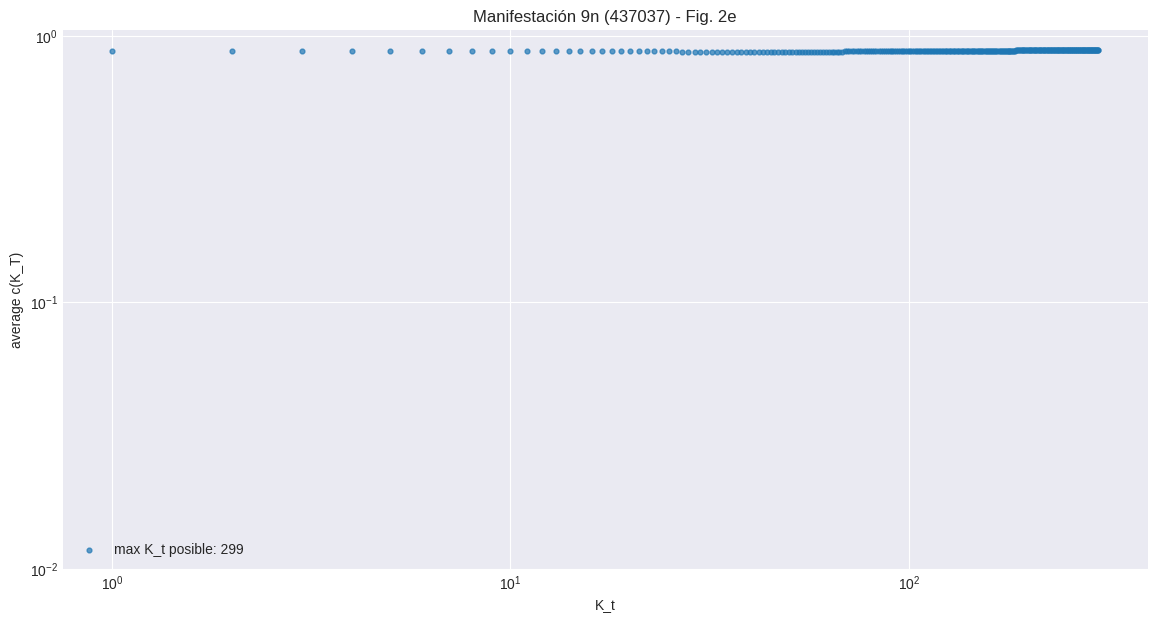

In [14]:

LIMITE_SUP = 300
# Dado un diccionario, grafica un scatter plot con las claves en el eje X y los valores en el Y

path = plots_folder + hora + "_Fig_2e_" + str(LIMITE_SUP) + ".png"

fig = plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-v0_8-darkgrid')

plt.xscale('log')  
plt.yscale('log')      
plt.ylim(0.01, 1.05)     


# Obtener las claves y los valores del diccionario
kt = list(dict_tres_avg_clust_fig2e.keys())[:LIMITE_SUP]
clust = list(dict_tres_avg_clust_fig2e.values())[:LIMITE_SUP]

plt.scatter(kt, clust, s=dot_size, alpha=alpha)

plt.xlabel("K_t")
plt.ylabel("average c(K_T)")
plt.title("Manifestación " + MANIFESTACION + " (" + hora + ") - Fig. 2e")
plt.legend(["max K_t posible: " + str(int(max(kt)))])
plt.savefig(path)

plt.show()
    